<a href="https://colab.research.google.com/github/YzdnByat/Artificial-Intelligence-/blob/main/HW1/AI_Aliyari_HW1_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import io
import numpy as np

ابتدا تمام کتاب خانه هایی که نیاز داریم راایمپورت میکنیم

In [5]:
#نحوه خواندن دیتاست
data_set = "112.mat"
data = io.loadmat(data_set)
#انتخاب یک سری از دیتا ها
signal = data["X112_FE_time"].flatten()
#نمایش دیتای انتخاب شده
print(f"signal: ",signal)
#نمایش دیتا روی نمودار با استفاده از متپلات
freq = 48000
time = np.arange(len(signal)) / freq

signal:  [ 0.22312364  0.24551818  0.27181636 ...  0.06122545 -0.09163273
 -0.27448727]


حال با استفاده از دستور
io.loadmat(data_set)
تمام دیتا را در یک متعیر ذخیره میکنیم.




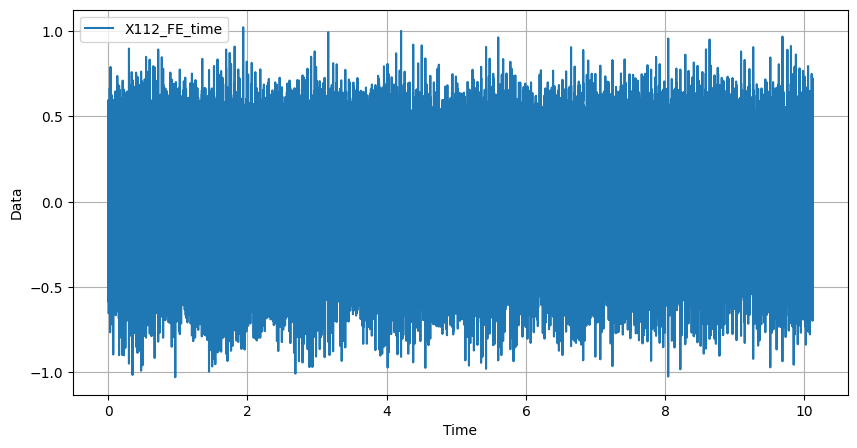

In [6]:
plt.figure(figsize = (10, 5))
plt.plot(time[:], signal[:], label="X112_FE_time")
plt.xlabel("Time")
plt.ylabel("Data")
plt.legend()
plt.grid(True)
plt.show()

اکنون از کتاب خانه متپلات استفاده کرده تا دیتا را نمایش دهیم.

In [7]:
start_time = int(2 * freq)
end_time = int(2.01 * freq)

برای نمایش دیتا از ثانیه 2 تا 2.01 باید برای المان time در دستور plt.plot() مقدار اغاز و پایان قرار دهیم.

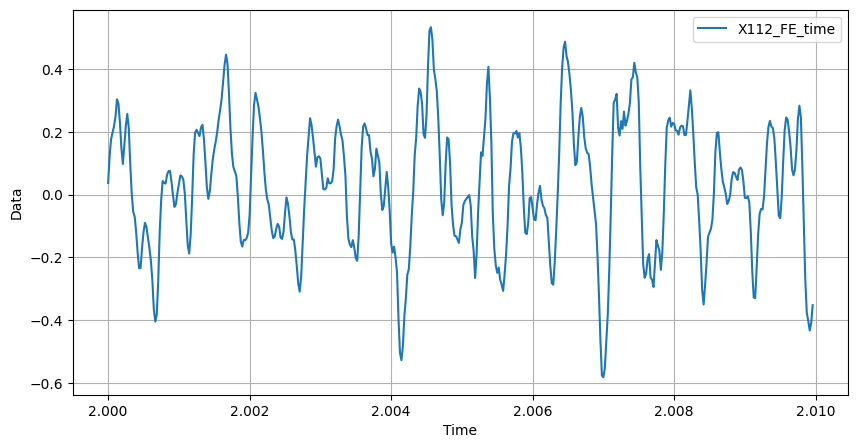

In [8]:
plt.figure(figsize = (10, 5))
plt.plot(time[start_time:end_time], signal[start_time:end_time], label="X112_FE_time")
plt.xlabel("Time")
plt.ylabel("Data")
plt.legend()
plt.grid(True)
plt.show()

پس از مشخص کردن این دو مقدار، دیتا را نمایش میدهیم.



In [9]:
def fft(signal, Fs):
    import numpy as np
    import matplotlib.pyplot as plt


    N = len(signal)
    fft_values = np.fft.fft(signal)
    freqs = np.fft.fftfreq(N, 1/Fs)

    fft_magnitude = np.abs(fft_values[:N//2])
    freqs = freqs[:N//2]

    return freqs, fft_magnitude

این کد تبدیل فوریه سریع را روی سیگنال ورودی اعمال می‌کند تا طیف فرکانسی آن را محاسبه کند. ابتدا طول سیگنال را تعیین کرده و سپس با استفاده از تبدیل فوریه را محاسبه می‌کند. محور فرکانسی با  بر اساس فرکانس نمونه‌برداری  تولید می‌شود. چون طیف متقارن است، فقط نیمه‌ی مثبت آن نگه داشته می‌شود. در نهایت، فرکانس‌ها و دامنه‌ی طیف خروجی داده می‌شوند که می‌توان از آن‌ها برای تحلیل فرکانسی سیگنال استفاده کرد.

In [11]:
#from Fourier import fft

freqs, fft_magnitude = fft(signal, freq)

مقادیری که با استفاده از این تابع بدست می اید را در دو متغیر دخیره کردیم.

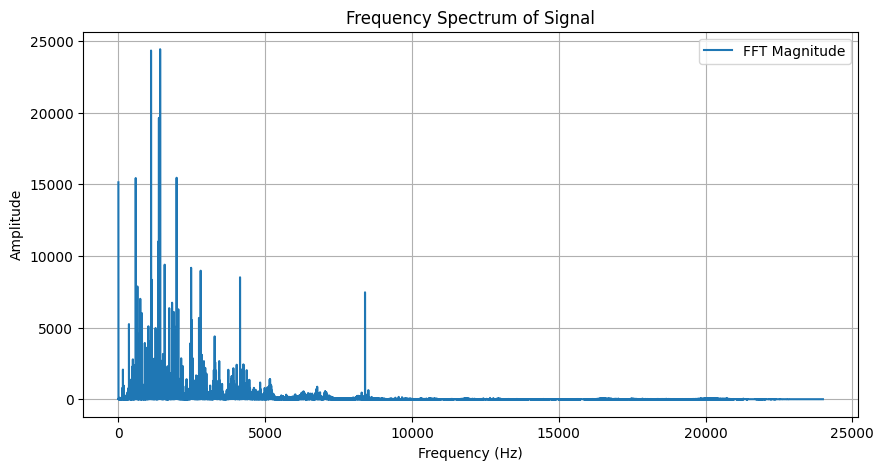

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(freqs, fft_magnitude, label="FFT Magnitude")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("Frequency Spectrum of Signal")
plt.grid(True)
plt.legend()
plt.show()

و حالا رسم میکنیم.

In [13]:
dominant_freq = freqs[np.argmax(fft_magnitude)]
print(f"dominant frequency: ", dominant_freq)

dominant frequency:  1422.180490607298


در این مرحله برای بدست اوردن فرکانس غالب، با استفاده از نامپای بیشترین طیف را انتخاب میکنیم و فرکانس متناظر با ان را برمیگردانیم

In [14]:
import numpy as np

def segment_fft(signal, segment_size, overlap_size, Fs):


    num_segments = (len(signal) - segment_size) // overlap_size + 1
    fft_results = []

    for i in range(num_segments):

        start = i * overlap_size
        end = start + segment_size
        segment = signal[start:end]


        fft_values = np.fft.fft(segment)
        freqs = np.fft.fftfreq(len(segment), 1/Fs)
        fft_magnitude = np.abs(fft_values[:len(segment)//2])
        fft_results.append(fft_magnitude)

    return np.array(fft_results)

این تابع سیگنال را به قطعات کوچک‌تر تقسیم کرده و برای هر قطعه تبدیل فوریه  محاسبه می‌کند. این کار برای تحلیل فرکانسی بخش‌های مختلف سیگنال انجام می‌شود.

In [16]:
#from segment import segment_fft

segment_size = 128
overlap_size = 64

fft_segments = segment_fft(signal, segment_size, overlap_size, freq)

مقادیر segment_size و overlap_size دست ما میباشد و طبق دلخواه میتوان تغییر داد. هر چه مقدار اورلپ بیشتر باشد، رزولوشن بیشتری داریم ولی محاسبات هم بیشتر میشود. پس یک مقدار متوسطی برابر با 50 درصد را اتخاذ میکنی

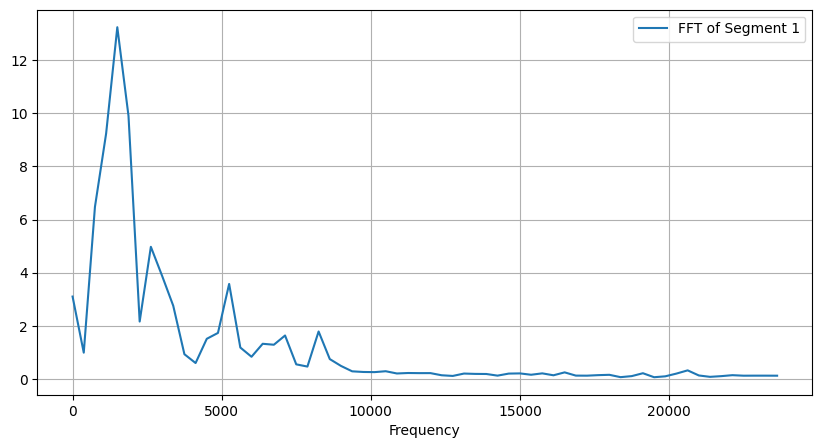

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(np.fft.fftfreq(segment_size, 1/freq)[:segment_size//2], fft_segments[0], label="FFT of Segment 1")
plt.xlabel("Frequency")
plt.grid(True)
plt.legend()
plt.show()

طبق روال قبلی رسم میکنیم.


In [19]:
df = pd.DataFrame(fft_segments)


این خط، نتایج تبدیل فوریه قطعات تقسیم‌شده‌ی سیگنال را به یک جدول دیتافریم در پاندا تبدیل می‌کند.

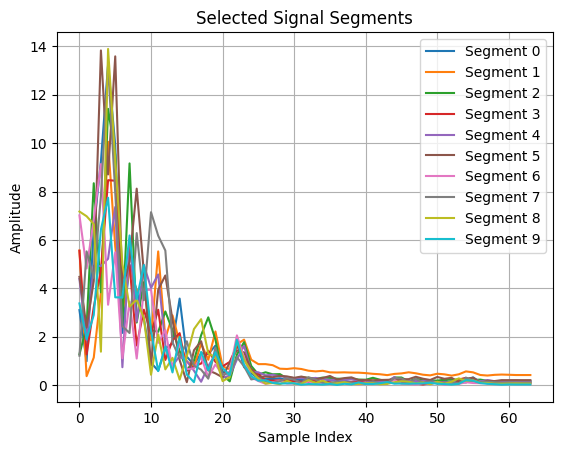

In [20]:
for i in range(10):
    plt.plot(df.iloc[i * 3], label=f'Segment {i}')

plt.title("Selected Signal Segments")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()


حال با استفاده از یک حلقه مضارب 10 عدد 13 را رسم میکنیم و هر کدام با یک رنگ میشود.

In [21]:
import numpy as np

def features(signal):

    mean_value = np.mean(signal)
    std_value = np.std(signal)
    rms_value = np.sqrt(np.mean(signal**2))

    return mean_value, std_value, rms_value


در این فانکشن با استفاده از امکاناتی که نامپای در اختیار ما قرار میدهد، مقادیر خواسته شده را ریترن میکنیم

In [23]:
#from feature_extraction import features

features = [features(segment) for segment in df.values]
df_features = pd.DataFrame(features, columns=['Mean', 'Std Dev', 'RMS'])

mean_value, std_value, rms_value = df_features.iloc[0]


print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_value}")
print(f"RMS: {rms_value}")

df_features.to_csv("features.csv", index=False)

Mean: 1.2784481396117742
Standard Deviation: 2.4755505781180918
RMS: 2.7861766473965046


این کد ابتدا تابع استخراج ویژگی را از فایل مربوطه فراخوانی می‌کند. سپس با استفاده از این تابع، ویژگی‌های هر بخش از داده را محاسبه کرده و در یک فهرست ذخیره می‌کند. این فهرست به یک دیتافریم تبدیل شده که شامل میانگین، انحراف معیار و مقدار ریشه میانگین مربعات هر بخش است. در ادامه، مقدار اولین ردیف این دیتافریم استخراج و نمایش داده می‌شود. در پایان، دیتافریم به یک فایل با فرمت سی‌اس‌وی ذخیره می‌شود.